In [4]:
cd '/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks'

/mmfs1/data/aglinska/BC-MRI-AE/Colab Notebooks


In [13]:
import pickle
import umap
from helper_funcs import *
from sklearn.decomposition import PCA

In [8]:
embded = pickle.load(open('../Data/embedded_data.pickle','rb'))

In [96]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')

Text(0.5, 1.0, 'PCA variance explained (salient space)')

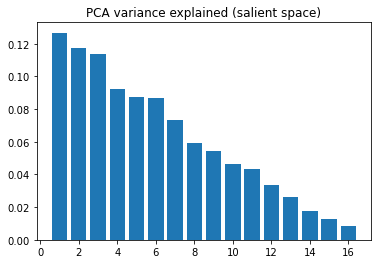

In [81]:
bg = embded['embedding_sl']
pca = PCA()
pca.fit(bg)
varExpl = pca.explained_variance_ratio_
xs = np.arange(len(varExpl))+1
plt.bar(xs,varExpl)
plt.title('PCA variance explained (salient space)')

array([0.19273984, 0.35773265, 0.49681917, 0.6239216 , 0.7297562 ,
       0.80671865, 0.8624242 , 0.90239775, 0.92897594, 0.94998693,
       0.9627391 , 0.97290564, 0.98180795, 0.9889105 , 0.994869  ,
       1.0000001 ], dtype=float32)

Text(0.5, 1.0, 'PCA variance explained (background space)')

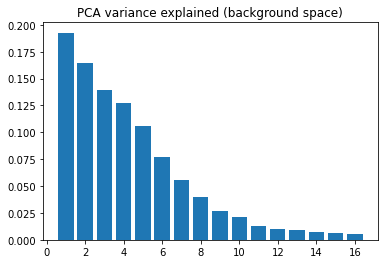

In [90]:
bg = embded['embedding_bg']
pca = PCA()
pca.fit(bg)
varExpl = pca.explained_variance_ratio_
xs = np.arange(len(varExpl))+1
plt.bar(xs,varExpl)
plt.title('PCA variance explained (background space)')

In [91]:
varExpl.cumsum()

array([0.19273984, 0.35773265, 0.49681917, 0.6239216 , 0.7297562 ,
       0.80671865, 0.8624242 , 0.90239775, 0.92897594, 0.94998693,
       0.9627391 , 0.97290564, 0.98180795, 0.9889105 , 0.994869  ,
       1.0000001 ], dtype=float32)

In [46]:
import scipy
dist = scipy.spatial.distance.pdist
squareform = scipy.spatial.distance.squareform

In [64]:
from tqdm import tqdm

100%|██████████| 16/16 [00:40<00:00,  2.55s/it]


Text(0.5, 1.0, 'RSA similarity with uncompressed space (background)')

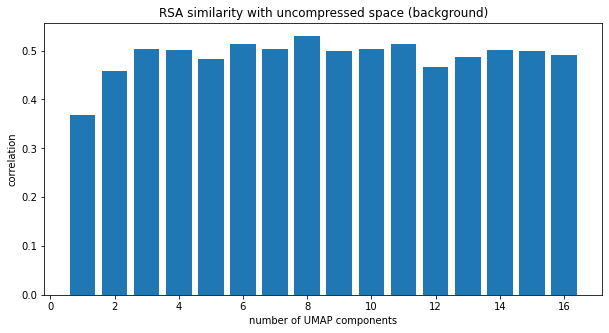

In [84]:
space = embded['embedding_bg']
c = list()
for i in tqdm(range(16)):
    reducer = umap.UMAP(n_neighbors=15,n_components=i+1,metric='euclidean')
    tx = reducer.fit_transform(space)
    r = np.corrcoef(get_triu(squareform(pdist(tx))),get_triu(squareform(pdist(space))))[0,1]
    c.append(r)
    
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(c))+1,c)
plt.xlabel('number of UMAP components')
plt.ylabel('correlation')
plt.title('RSA similarity with uncompressed space (background)')

100%|██████████| 16/16 [00:42<00:00,  2.68s/it]


Text(0.5, 1.0, 'RSA similarity with uncompressed space (salient)')

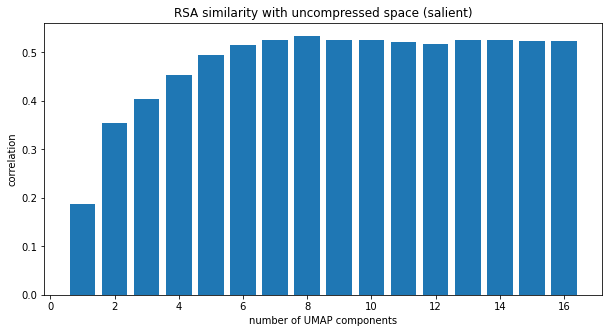

In [85]:
space = embded['embedding_sl']
c = list()
for i in tqdm(range(16)):
    reducer = umap.UMAP(n_neighbors=15,n_components=i+1,metric='euclidean')
    tx = reducer.fit_transform(space)
    r = np.corrcoef(get_triu(squareform(pdist(tx))),get_triu(squareform(pdist(space))))[0,1]
    c.append(r)
    
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(c))+1,c)
plt.xlabel('number of UMAP components')
plt.ylabel('correlation')
plt.title('RSA similarity with uncompressed space (salient)')

In [94]:
reducer = umap.UMAP(n_neighbors=15,n_components=6,metric='euclidean')
tx = reducer.fit_transform(space)
#r = np.corrcoef(get_triu(squareform(pdist(tx))),get_triu(squareform(pdist(space))))[0,1]

In [111]:
key = 'AgeAtScan'

In [124]:
df = df[df['DxGroup'].values==1]

0.0033594733548882715

In [188]:
def get_corrs(key,data_scale='ratio'):
#key = 'AgeAtScan'
#l = 1
    c = []
    for i in range(6):
        idx = ~np.isnan(df[key].values)
        v1 = get_triu(make_RDM(df[key].values[idx],data_scale=data_scale))
        v2 = get_triu(squareform(pdist(tx[idx,i][:,np.newaxis])))
        c.append(np.corrcoef(v1,v2)[0,1])
    return c

In [186]:
np.unique(df['ADOS_Social'].values)

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       16., 17., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [190]:
key

'IQTest'

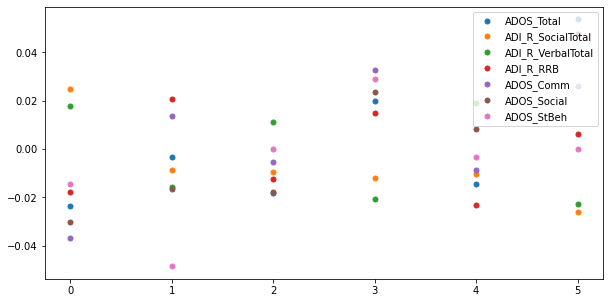

In [202]:
keys = ['ADOS_Total', 'ADI_R_SocialTotal' ,'ADI_R_VerbalTotal' ,'ADI_R_RRB', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh']

plt.figure(figsize=(10,5))
for key in keys:
    plt.plot(get_corrs(key),'.',markersize=10)
    
plt.legend(keys)

In [ ]:
keys = ['ADOS_Total', 'ADI_R_SocialTotal' ,'ADI_R_VerbalTotal' ,'ADI_R_RRB', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh']

plt.figure(figsize=(10,5))
for key in keys:
    plt.plot(get_corrs(key),'.',markersize=10)
    
plt.legend(keys)

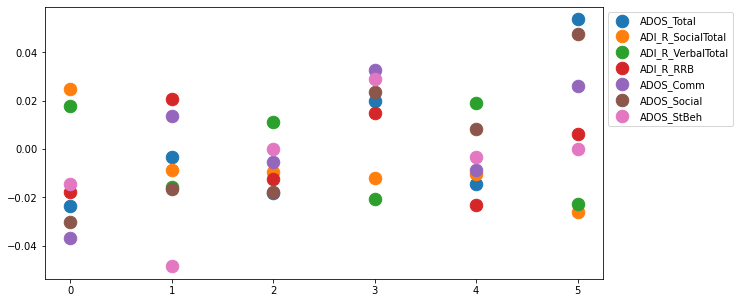

In [221]:
keys = ['ADOS_Total', 'ADI_R_SocialTotal' ,'ADI_R_VerbalTotal' ,'ADI_R_RRB', 'ADOS_Comm', 'ADOS_Social', 'ADOS_StBeh']

plt.figure(figsize=(10,5))
for key in keys:
    plt.plot(get_corrs(key),'.',markersize=25)
    
plt.legend(keys,bbox_to_anchor=(1, 1.0))

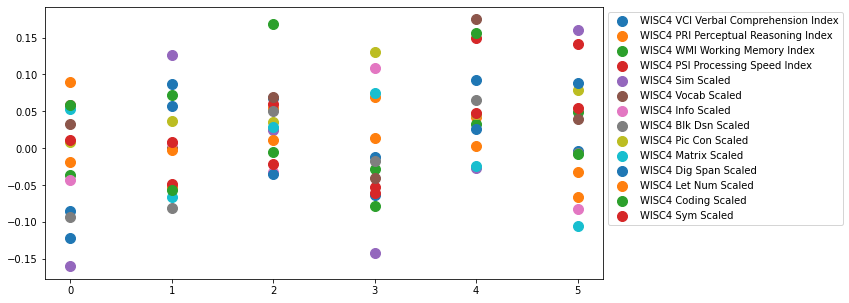

In [217]:
keys = [  'WISC4 VCI Verbal Comprehension Index',
       'WISC4 PRI Perceptual Reasoning Index',
       'WISC4 WMI Working Memory Index', 'WISC4 PSI Processing Speed Index',
       'WISC4 Sim Scaled', 'WISC4 Vocab Scaled', 'WISC4 Info Scaled',
       'WISC4 Blk Dsn Scaled', 'WISC4 Pic Con Scaled', 'WISC4 Matrix Scaled',
       'WISC4 Dig Span Scaled', 'WISC4 Let Num Scaled', 'WISC4 Coding Scaled',
       'WISC4 Sym Scaled']

plt.figure(figsize=(10,5))
for key in keys:
    plt.plot(get_corrs(key),'.',markersize=20)
    
plt.legend(keys,bbox_to_anchor=(1, 1.0))

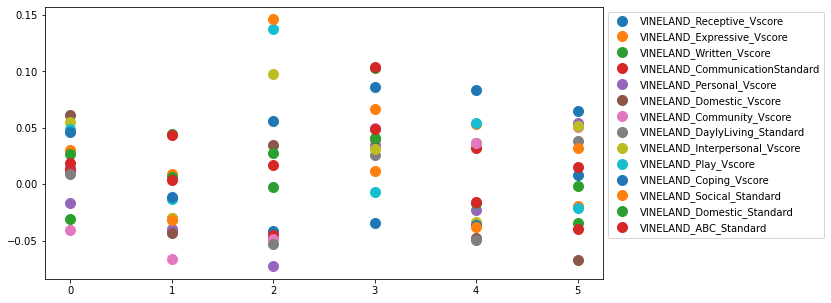

In [219]:
keys = ['VINELAND_Receptive_Vscore', 'VINELAND_Expressive_Vscore',
       'VINELAND_Written_Vscore', 'VINELAND_CommunicationStandard',
       'VINELAND_Personal_Vscore', 'VINELAND_Domestic_Vscore',
       'VINELAND_Community_Vscore', 'VINELAND_DaylyLiving_Standard',
       'VINELAND_Interpersonal_Vscore', 'VINELAND_Play_Vscore',
       'VINELAND_Coping_Vscore', 'VINELAND_Socical_Standard',
       'VINELAND_Domestic_Standard', 'VINELAND_ABC_Standard']

plt.figure(figsize=(10,5))
for key in keys:
    plt.plot(get_corrs(key),'.',markersize=20)
    
plt.legend(keys,bbox_to_anchor=(1, 1.0))